<a href="https://colab.research.google.com/github/qGn300/machine-learning-for-everybody/blob/master/Machine_Learning_Day_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

**Dateset:**

UCI Machine Learning Repository [ https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope ]

In [2]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"].unique()
# Deinition below
# g = gamma
# h = hadron

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == "g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


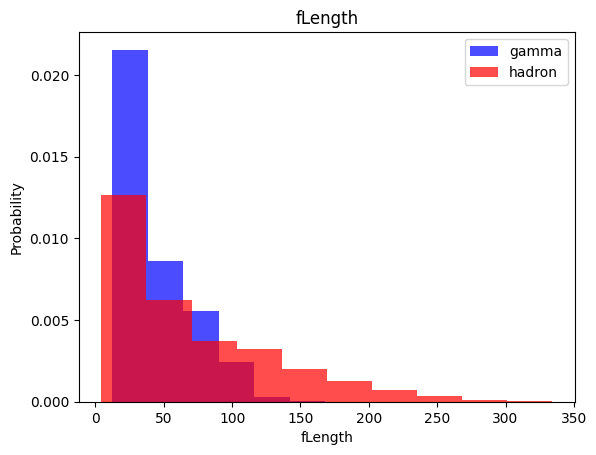

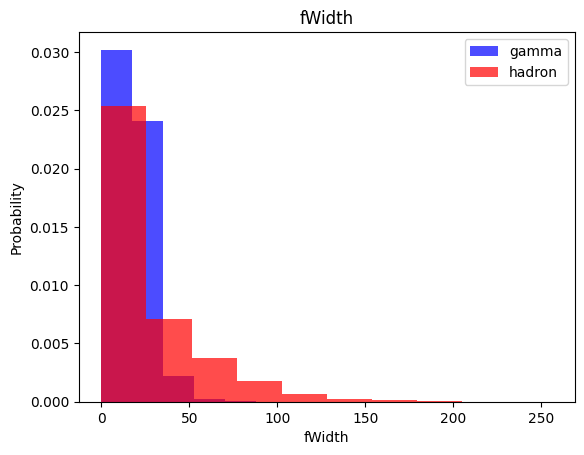

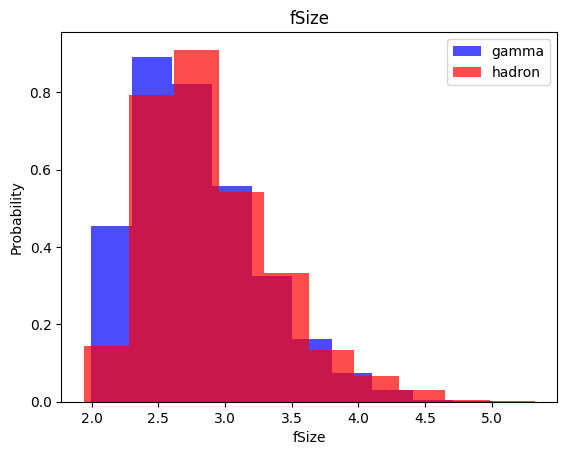

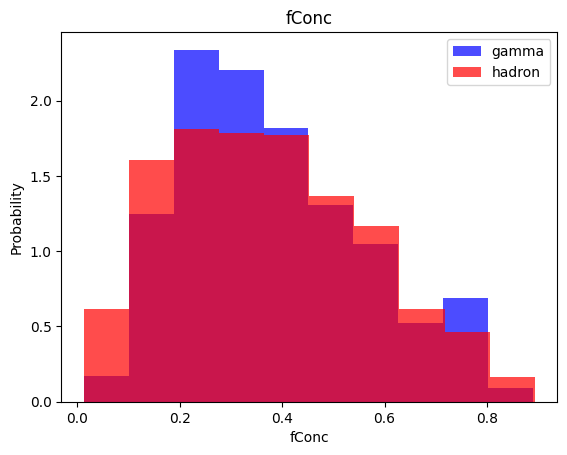

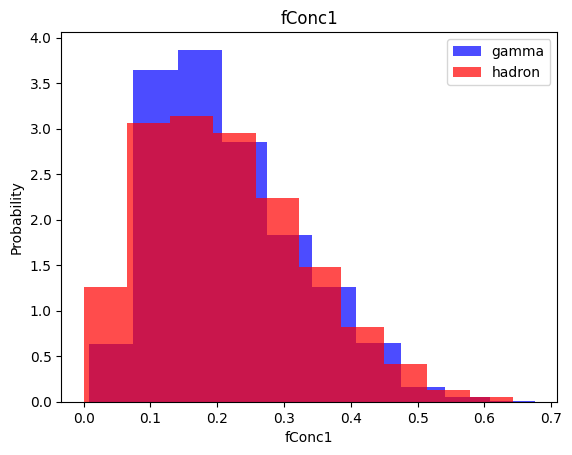

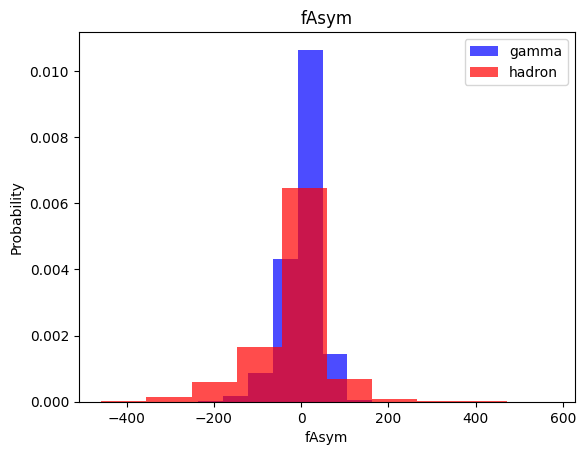

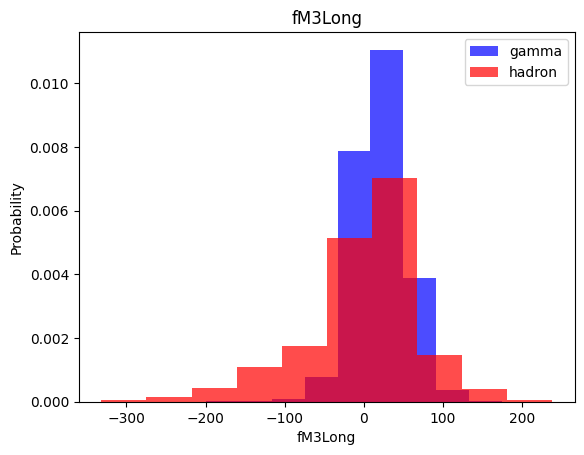

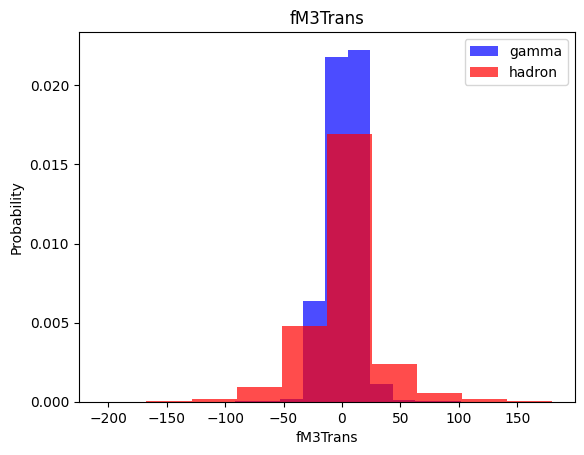

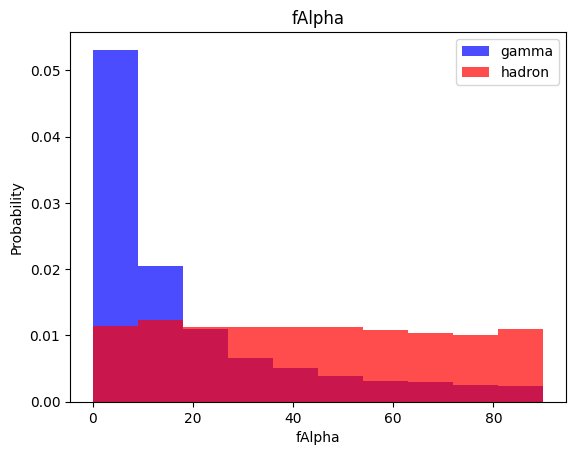

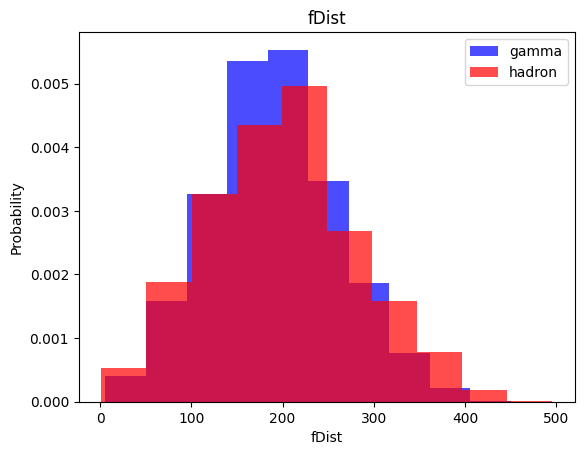

In [ ]:
for  label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color= 'blue', label = 'gamma', alpha = 0.7, density = True)
  plt.hist(df[df["class"]==0][label], color= 'red', label = 'hadron', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation,test datasets

In [15]:
#train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

df_shuffled = df.sample(frac=1, random_state=42)  # Shuffle with a fixed random state for reproducibility
train_size = int(0.6 * len(df))
valid_size = int(0.2 * len(df))

train = df_shuffled[:train_size]
valid = df_shuffled[train_size:train_size + valid_size]
test = df_shuffled[train_size + valid_size:]


Some columns have values in the range of 100+ while some are in the range of 0.0x

Scale of these numbers are way off which effects the result sometime.

We will need to scale it properly to make it relative to the mean or standard deviation.

This is how the code was earlier -

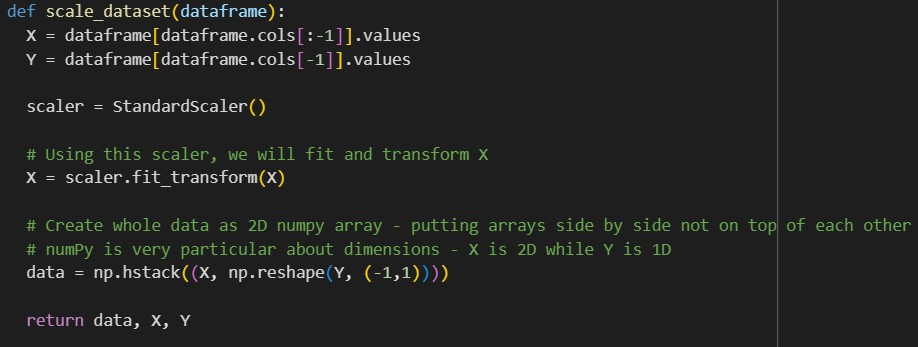


Down below we will find sample size for gamma and hadrons are complete off. So we will update the code to accomodate oversampler feature.

In [6]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  Y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()

  # Using this scaler, we will fit and transform X
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, Y = ros.fit_resample(X, Y) # It increases the sample size of the lower sampled data which is hadron in this case

  # Create whole data as 2D numpy array - putting arrays side by side not on top of each other
  # numPy is very particular about dimensions - X is 2D while Y is 1D
  data = np.hstack((X, np.reshape(Y, (-1,1))))

  return data, X, Y


In [7]:
train

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
18749,48.0573,11.0862,2.9571,0.3620,0.1882,0.4200,32.4358,-2.2992,26.9300,165.2240,0
7051,23.4858,0.0000,2.2393,0.7378,0.3775,-2.9397,13.0915,0.0001,19.3410,235.3420,1
10901,40.5429,19.4073,3.3382,0.2369,0.1269,29.1908,27.0567,-7.1243,10.0643,195.6030,1
15858,16.6123,7.8423,2.5572,0.5829,0.3371,6.7271,-10.3448,-2.3240,14.5111,214.2655,0
17968,205.4250,37.7936,3.2727,0.2167,0.1257,46.0952,-210.9350,-29.7478,60.0580,206.1730,0
...,...,...,...,...,...,...,...,...,...,...,...
87,34.8890,19.6402,2.8429,0.3747,0.2534,29.9825,29.1531,12.4846,8.3760,227.3360,1
7630,20.3329,17.3059,2.6707,0.4098,0.2231,11.3876,-9.3600,12.8626,89.6161,164.0240,1
4163,56.6139,26.1253,3.3259,0.1667,0.0862,0.5887,48.7686,-20.3598,9.8420,203.8090,1
3382,59.4502,18.2507,2.6493,0.3991,0.2119,22.6093,62.4000,9.1050,0.1321,177.6130,1


In [8]:
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0])) #hadron

7409
4003


There is around 7K gammas, but only 4K hadron dataset available. We would like to oversample our training data. We would like to increase the sample size of hadron some what near to gamma samples. We have used Over Sampler to do this in the above code.

In [16]:
train, X_train, Y_train = scale_dataset(train, oversample = True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample = False)
test, X_test, Y_test = scale_dataset(test, oversample = False)


In [ ]:
print(len(Y_train)) # hadron
print(len(X_train)) # gamma
print(sum(Y_train == 1))
print(sum(Y_train == 0))

3804
3804
2473
1331


# ML Models:
1. K-Nearest Neighbours(KNN) - Classification Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)


KNeighborsClassifier()

In [28]:
Y_pred = knn_model.predict(X_test)
Y_pred

array([1, 0, 0, ..., 1, 1, 0])

In [29]:
Y_test

array([1, 0, 0, ..., 1, 1, 0])

In [30]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1331
           1       0.85      0.85      0.85      2473

    accuracy                           0.80      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.80      0.80      3804



# Precision and Recall

Precision: Out of all the ones we have labelled as positive, how many of them are true positive

Recall: Out of all the available truely postives, how many have we predicted as positive correctly

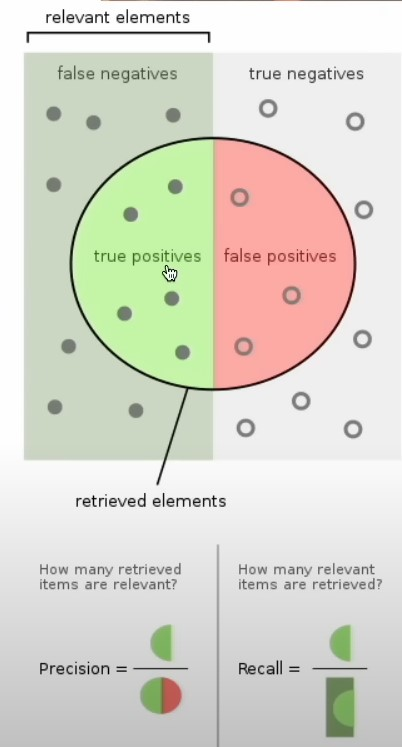




In [32]:
X_single = [[48.7967, 76.0021,	0.6449,	1.3918,	1.1982,	20.7004,	29.0110,	-10.2027,	7.0920,	97.8828]]
Y_single_pred = knn_model.predict(X_single)
print(Y_single_pred)

[0]
